<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Data_Wrangling_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

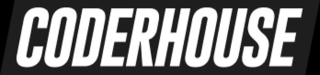

# **CURSO DE DATA SCIENCE**

# **DATA WRANGLING**

# **DESAFIO N° 8 - DATA WRANGLING**

*AUTOR:Eduardo ETTLIN

# <b> Conectamos el Drive e importamos lo necesario para trabajar.

In [1]:
#Importamos Pandas
import pandas as pd
#Importamos NumPY
import numpy as np
#Importamos Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Conectamos mi drive
from google.colab import drive
#Importamos OS
import os
#Montamos drive
drive.mount('/content/gdrive', force_remount=True)
# Establecer ruta de acceso en drive
import os
print(os.getcwd())


Mounted at /content/gdrive
/content


In [2]:
os.chdir("/content/gdrive/MyDrive/DScience_41870")
print(os.getcwd())

/content/gdrive/MyDrive/DScience_41870


# Lectura de archivos

In [3]:
train=pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv',sep=',')
train.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
print(train.shape)

(2845342, 47)


# Exploracion dataset



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

# ENRIQUECER con CAMPOS del Trabajo Anterior

In [6]:
train['Hora'] = pd.to_datetime( train['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la cual ocurrió el accidente
train['Anio_Mes'] =  pd.to_datetime( train['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES
train['day_of_week'] = pd.to_datetime( train['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}   # Nombre del Día de la Semana
train['day_of_week_lbl'] = train['day_of_week'].apply(lambda x: days[x])
train['Trimestre'] = pd.to_datetime(train['Start_Time']).dt.quarter

train.head(3)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hora,Anio_Mes,day_of_week,day_of_week_lbl,Trimestre
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,Night,Night,Night,Night,0,2016-02,0,Lunes,1
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,Night,Night,Night,Night,5,2016-02,0,Lunes,1
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,Night,Night,Night,Day,6,2016-02,0,Lunes,1


# Borrado de duplicados

In [7]:
print(train.shape)
train= train.drop_duplicates()
print(train.shape)

(2845342, 52)
(2845342, 52)


# Analisis de nulos (OJO)

In [8]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(train.isnull().sum()/train.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Sunrise_Sunset            0.100761
Nautical_Twilight         0.100761
Astronomical_Twilight     0.100761
Civil_Twilight            0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<Axes: >

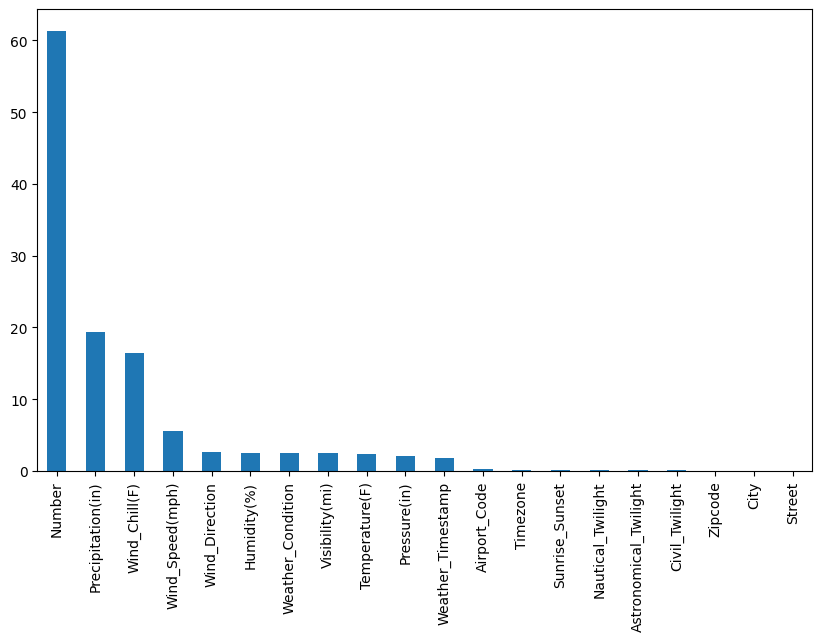

In [9]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [10]:
pip install missingno   # quiet mode

<Axes: >

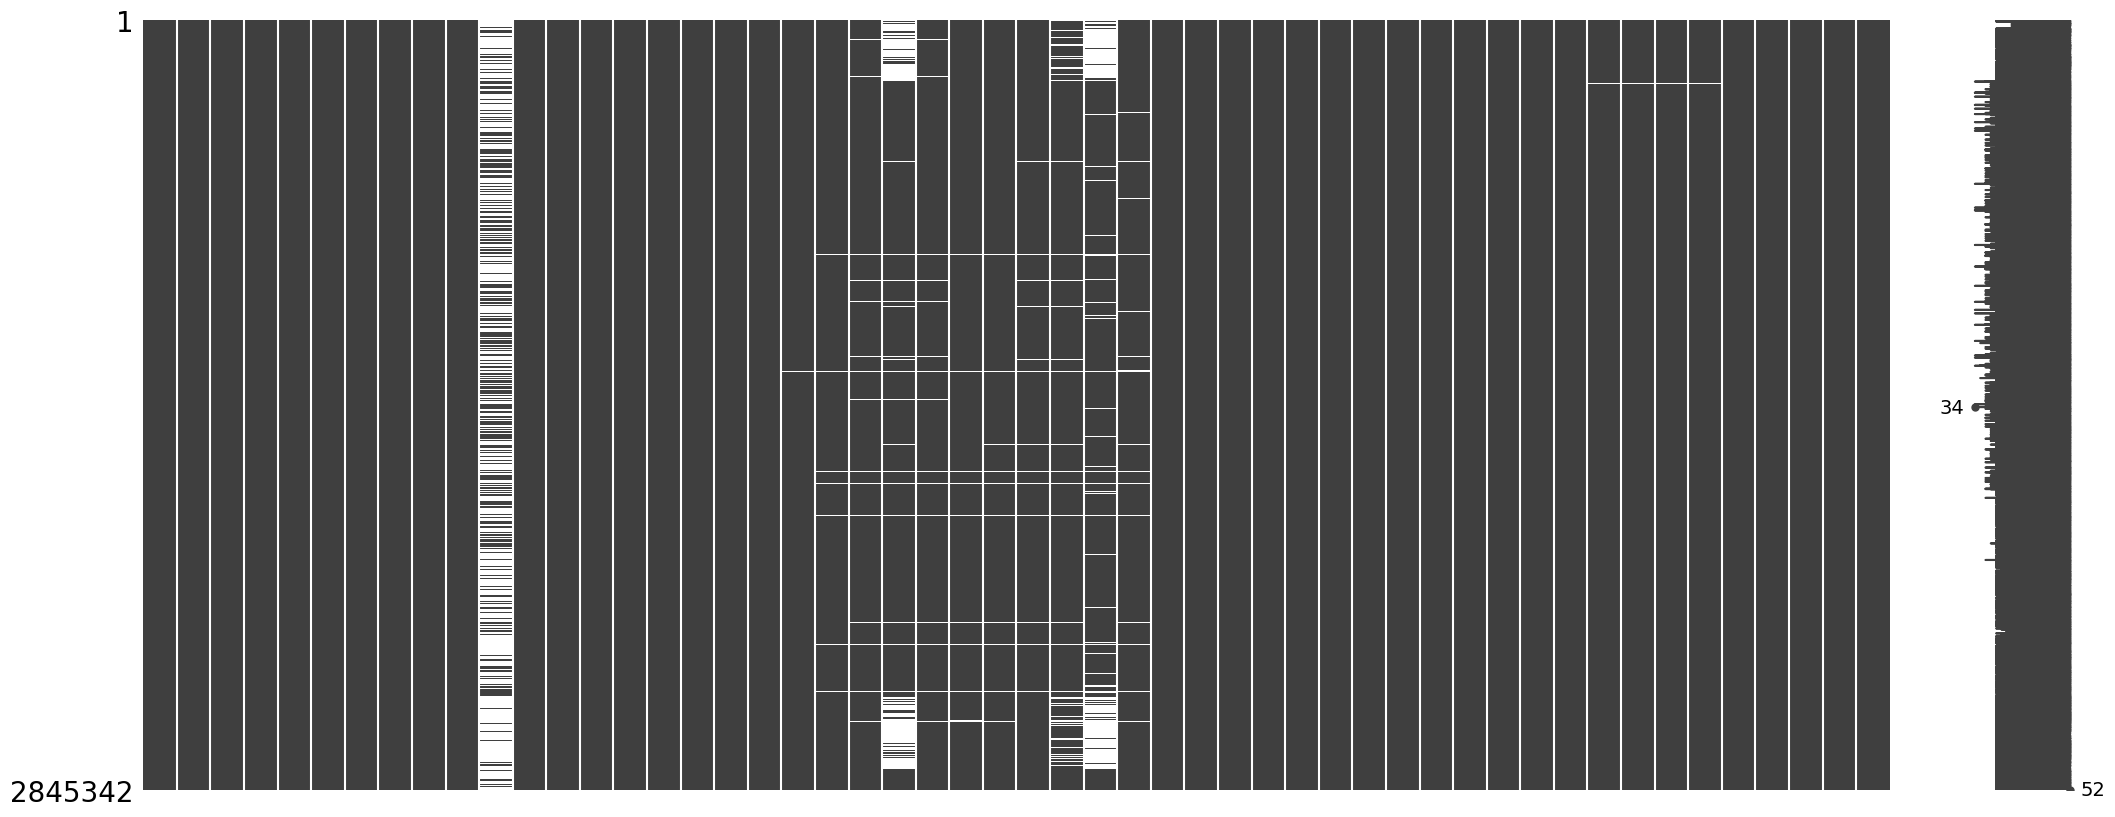

In [11]:
import missingno as msno
msno.matrix(train)

<Axes: >

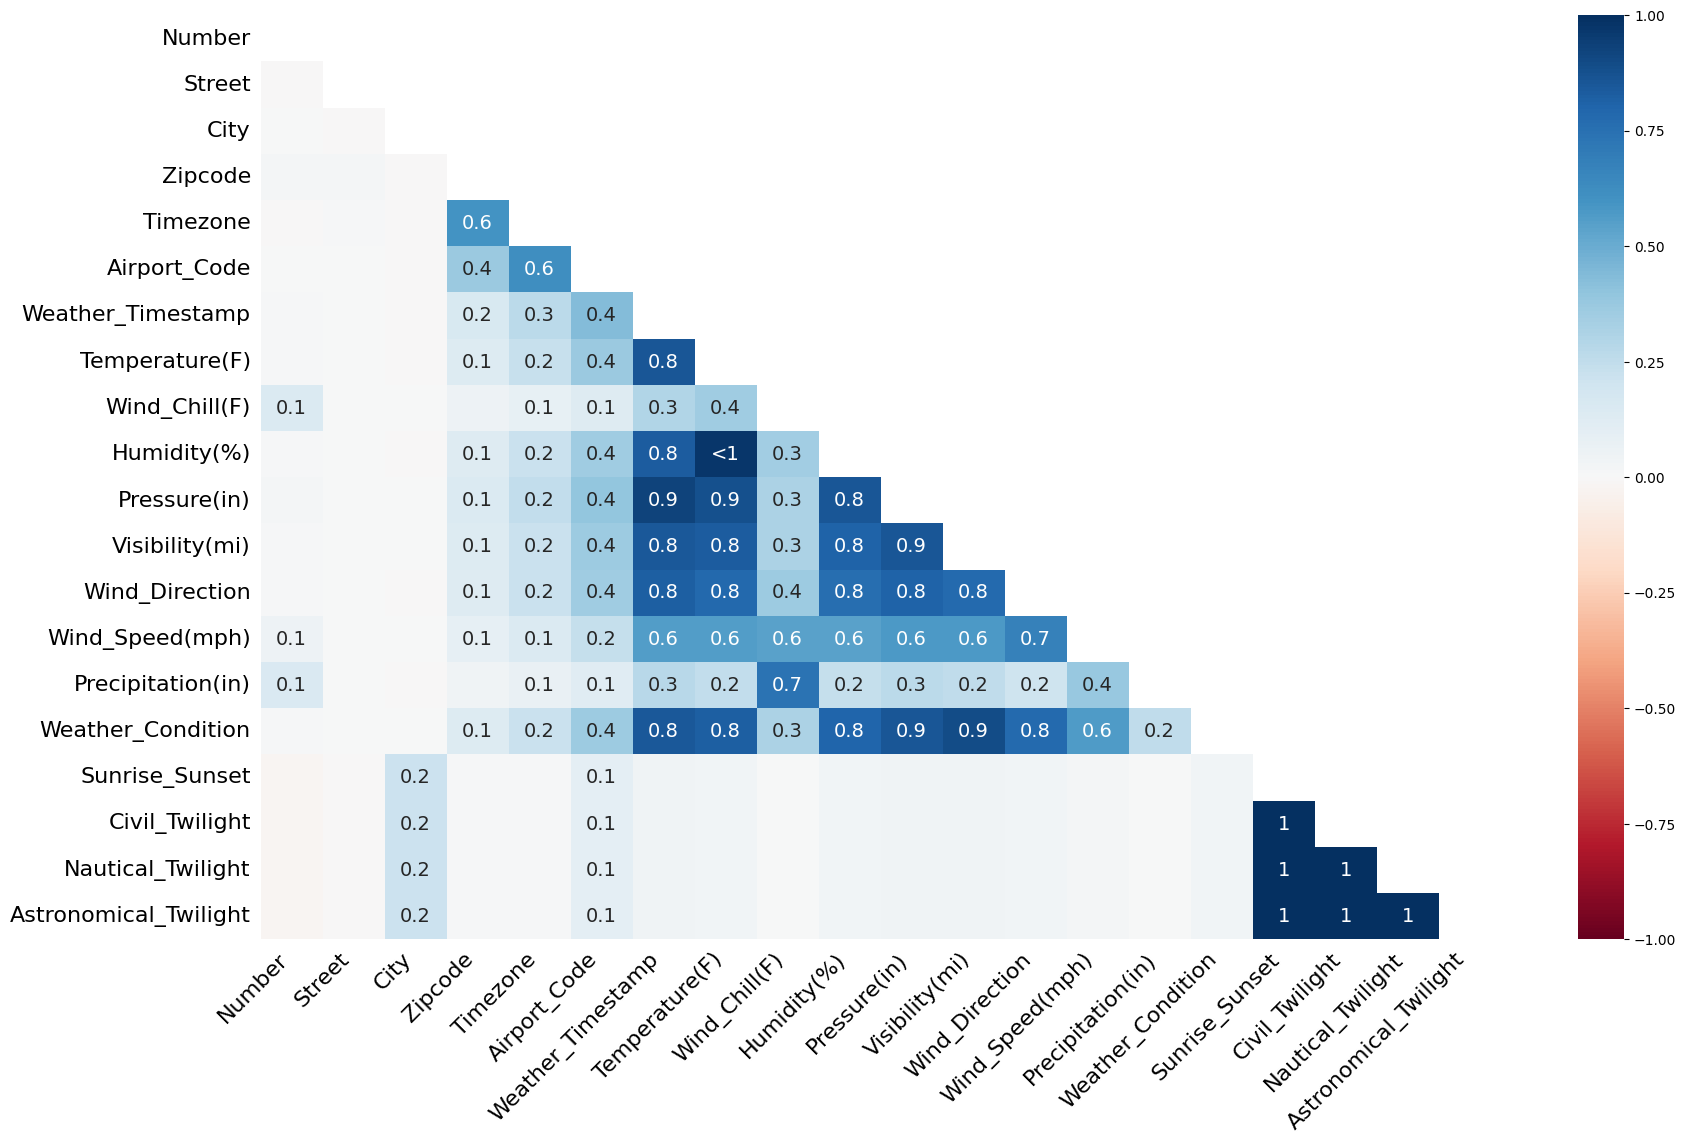

In [12]:
msno.heatmap(train)

<Axes: >

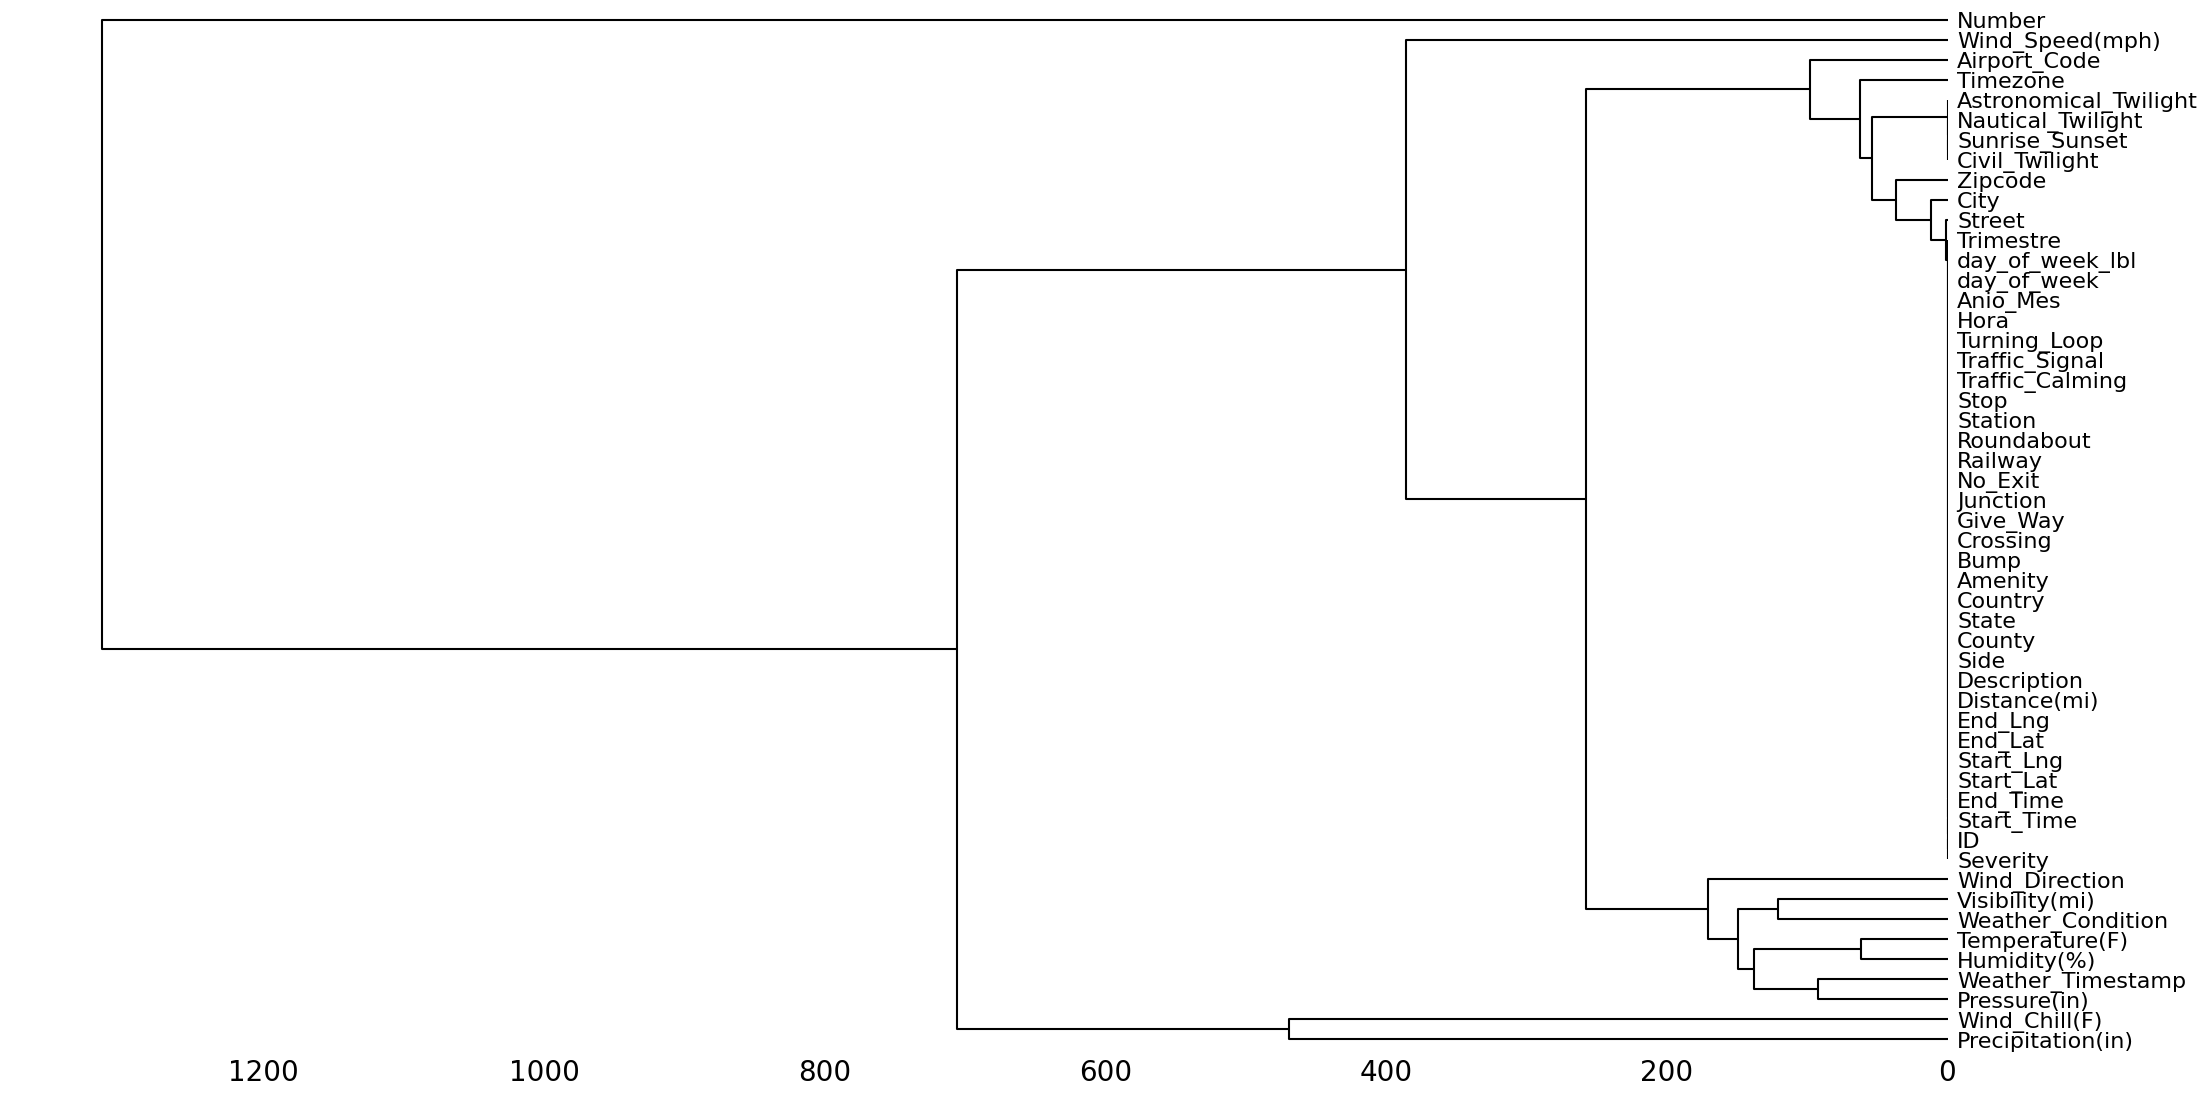

In [13]:
msno.dendrogram(train)

Comenzar a mirar las variables con mayor cantidad de nulos y explorar si tienen algo que aportar

In [14]:
train.Number.value_counts() # Decision: borrar

1.0          10662
2.0           8747
101.0         6706
100.0         6187
198.0         2617
298.0         2270
200.0         2228
201.0         2224
398.0         2191
199.0         2116
301.0         2014
300.0         1855
401.0         1840
498.0         1835
400.0         1822
598.0         1773
98.0          1765
698.0         1735
798.0         1710
299.0         1682
500.0         1676
501.0         1644
701.0         1607
1000.0        1583
1001.0        1557
600.0         1540
399.0         1526
800.0         1524
898.0         1520
601.0         1506
99.0          1503
699.0         1487
1198.0        1441
499.0         1436
998.0         1431
700.0         1427
599.0         1380
1298.0        1339
1400.0        1294
900.0         1289
801.0         1285
901.0         1284
1098.0        1267
1998.0        1256
999.0         1247
1201.0        1236
799.0         1234
1698.0        1232
1598.0        1219
1398.0        1190
1199.0        1183
1200.0        1177
1101.0      

In [15]:
train.Severity.value_counts() # Decision:

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [16]:
train.Wind_Direction.value_counts() # Decisión:
# train.Wind_Chill.value_counts() # Decision:

CALM        433622
S           169743
W           167830
WNW         145046
NW          141344
SSW         137282
WSW         130734
SW          128970
SSE         125516
NNW         124583
E           123904
N           123517
SE          109512
VAR         104182
ESE         102612
ENE          94801
NE           88704
NNE          84991
Calm         76534
West         39239
South        39175
North        34378
East         23119
Variable     22229
Name: Wind_Direction, dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845342 entries, 0 to 2845341
Data columns (total 52 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [18]:
train.Precipitation.value_counts() # Decision:

AttributeError: ignored

In [ ]:
train.Wind_Speed.value_counts() #

In [ ]:
train.Wind_Chill.value_counts() #

In [ ]:
train.Humidity.value_counts() #

In [ ]:
train.Start_Lat.value_counts()


In [ ]:
train.Start_Lng.value_counts()


In [ ]:
train.End_Lat.value_counts()


In [ ]:
train.End_Lng.value_counts()


In [ ]:
train.shape

# Borrado de columnas

In [19]:
# col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] # Columnas a borrar que no aportan
col_del = ['Start_Lat', 'Start_Lng','End_Lat', 'End_Lng'] # Columnas a borrar que no aportan

In [20]:
# Borrar variables
train_x=train.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
train_x.columns # Verificando las columnas que quedaron

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hora', 'Anio_Mes', 'day_of_week',
       'day_of_week_lbl', 'Trimestre'],
      dtype='object')

In [21]:
#col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea'] # Columnas a interpolar


# Llenar con la mediana

In [22]:
#for i in col_inter: # reemplazar por la mediana en las columnas numericas en col_inter
#  train_x[i] = train_x[i].fillna(train_x[i].median())

In [23]:
#train_x.MasVnrArea.isnull().sum() # Verificar que funciono

# Llenar con categoria desconocido

In [24]:
col_cat= ['Number'] # Columnas cateogoricas

In [25]:
for i in col_cat: # Reemplazar los vacios por Desconocido
  train_x[i] = train_x[i].fillna('Desconocido')

In [26]:
train_x.Number.isnull().sum() # Verificando que funciona

0

In [27]:
#Relleno con valor 0
col_cat_2= ['Temperature', 'Wind_Chill', 'Humidity', 'Pressure',  'Visibility', 'Wind_Speed', 'Precipitation'] # Columnas cateogoricas


In [28]:
for i in col_cat_2: # Reemplazar los vacios por Desconocido
  train_x[i] = train_x[i].fillna(0)


KeyError: ignored

In [29]:
train_x.Temperature.isnull().sum() # Verificando que funciona

AttributeError: ignored

In [ ]:
train_x.Wind_Chill.isnull().sum()# Verificando que funciona

In [ ]:
train_x.Humidity.isnull().sum()# Verificando que funciona

In [ ]:
train_x.Pressure.isnull().sum()# Verificando que funciona

In [30]:
train_x.Visibility.isnull().sum()# Verificando que funciona

AttributeError: ignored

In [ ]:
train_x.Wind_Speed.isnull().sum()# Verificando que funciona

In [ ]:
train_x.Precipitation.isnull().sum()# Verificando que funciona

In [ ]:
train_x.Nautical_Twilight.dtype # Por ejemplo tomo Nautical_Twilight para verificar el tipo de datos de train_x

In [ ]:
train_x.Nautical_Twilight.value_counts()

# Recodificar variables categoricas

In [31]:
alldata=[] # lista para guardar resultados de One hot Encoding
alldata1=[] # lista para guardar resultados de
variables=[] # ir guardando las variables
for i in train_x.columns: # iterar sobre todas las columnas
  if train_x[i].dtype == 'O': # Quedarme con las que sean tipo object
    if len(train_x[i].unique()) ==2: # Si solo tienen dos categorias aplicar One Hot Encoding
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(train_x[i]) # Aplicar One Hot Encoding
      alldata.append(y) # ir agregando las columnas resultantes en alldata
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(train_x[i].unique()) >2: # Si las categorias tienen mas de 2 categorias aplicar LabelEncoder
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=train_x[i].astype('category').cat.codes # Aplicar Label Encoder
      alldata1.append(z) # Agregar a la lista alldata1
      variables.append(i) #
  if train_x[i].dtype == 'float64': # Si la columna es numerica entonces normalizar z score
    train_x[i]=(train_x[i]-train_x[i].mean())/(train_x[i].std()) # yapo
data_y=pd.concat(alldata, axis=1) # concatenar las columnas obtenidas One hot Encoding
data_z=pd.concat(alldata1, axis=1) # concatenar las columnas de Label Encoder
train_y= pd.concat([data_y,data_z,train_x],axis=1) # Unir todos los datasets One Hot Encoding, LabelEncoder, Z score
train_y=train_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
train_y.head() # mostrar que quedo

--------------------
Variable >2 categorias: ID
--------------------
Variable >2 categorias: Start_Time
--------------------
Variable >2 categorias: End_Time
--------------------
Variable >2 categorias: Description
--------------------
Variable >2 categorias: Number
--------------------
Variable >2 categorias: Street
--------------------
Variable >2 categorias: Side
--------------------
Variable >2 categorias: City
--------------------
Variable >2 categorias: County
--------------------
Variable >2 categorias: State
--------------------
Variable >2 categorias: Zipcode
--------------------
--------------------
Variable >2 categorias: Timezone
--------------------
Variable >2 categorias: Airport_Code
--------------------
Variable >2 categorias: Weather_Timestamp
--------------------
Variable >2 categorias: Wind_Direction
--------------------
Variable >2 categorias: Weather_Condition
--------------------
Variable >2 categorias: Sunrise_Sunset
--------------------
Variable >2 categorias: C

ValueError: ignored

# Verificando que no hay datos nulos

In [32]:
train_y.info()

NameError: ignored